In [1]:
import sys
import importlib

sys.path.append('/Users/awgol/code/syne-tune')

import syne_tune
importlib.reload(syne_tune)

import syne_tune.experiments
importlib.reload(syne_tune.experiments)

<module 'syne_tune.experiments' from '/Users/awgol/code/syne-tune/syne_tune/experiments.py'>

In [7]:
import pandas as pd
import numpy as np

In [2]:
tuner_job_names = (
    'speed-bs-it-nw-new-2022-02-16-15-04-07-976',
    'speed-bs-it-nw-new-2022-02-16-11-42-50-992', 
)

In [23]:
df = syne_tune.experiments.load_experiment(tuner_job_names[0], force_download=True).results

In [24]:
df.columns

Index(['step', 'loss', 'st_worker_timestamp', 'st_worker_time',
       'st_worker_cost', 'st_worker_iter', 'st_decision', 'st_status',
       'trial_id', 'config_dataloader_num_workers', 'config_epochs',
       'config_eval_interval', 'config_learning_rate', 'config_log_interval',
       'config_max_resource_level', 'config_n_eval_data',
       'config_n_train_data', 'config_per_device_eval_batch_size',
       'config_per_device_train_batch_size', 'config_seed',
       'config_st_checkpoint_dir', 'config_st_instance_count',
       'config_st_instance_type', 'config_weight_decay', 'st_tuner_time'],
      dtype='object')

In [25]:
len(df.trial_id.unique())

61

In [26]:
a = df.groupby(['trial_id', 'step']).agg(
    {'st_worker_timestamp':pd.Series.tolist}).reset_index()

In [27]:
a[(a.st_worker_timestamp.apply(len)>1)].trial_id.unique()

array([2, 4, 5, 6])

In [32]:
df[(df.trial_id==4) & (df.st_worker_iter==0)]

,step,loss,st_worker_timestamp,st_worker_time,st_worker_cost,st_worker_iter,st_decision,st_status,trial_id,config_dataloader_num_workers,...,config_n_eval_data,config_n_train_data,config_per_device_eval_batch_size,config_per_device_train_batch_size,config_seed,config_st_checkpoint_dir,config_st_instance_count,config_st_instance_type,config_weight_decay,st_tuner_time
61,100,0.6967,1.645024e+09,43.606897,0.036896,0,CONTINUE,InProgress,4,0,...,1,25000,1,8,0,/opt/ml/checkpoints,1,ml.g4dn.8xlarge,0.000001,603.473210
315,100,0.6944,1.645024e+09,47.039630,0.106414,0,CONTINUE,InProgress,4,0,...,1,25000,1,8,0,/opt/ml/checkpoints,1,ml.g4dn.8xlarge,0.000001,983.021081
316,100,0.6836,1.645025e+09,46.806744,0.073747,0,CONTINUE,InProgress,4,0,...,1,25000,1,8,0,/opt/ml/checkpoints,1,ml.g4dn.8xlarge,0.000001,983.021102
329,100,0.6793,1.645025e+09,74.473041,0.117336,0,CONTINUE,InProgress,4,0,...,1,25000,1,8,0,/opt/ml/checkpoints,1,ml.g4dn.8xlarge,0.000001,983.021384
634,100,0.6836,1.645025e+09,46.806744,0.073747,0,CONTINUE,InProgress,4,0,...,1,25000,1,8,0,/opt/ml/checkpoints,1,ml.g4dn.8xlarge,0.000001,1156.318755


In [35]:
df[(df.trial_id==5) & (df.st_worker_iter==0)]

,step,loss,st_worker_timestamp,st_worker_time,st_worker_cost,st_worker_iter,st_decision,st_status,trial_id,config_dataloader_num_workers,...,config_n_eval_data,config_n_train_data,config_per_device_eval_batch_size,config_per_device_train_batch_size,config_seed,config_st_checkpoint_dir,config_st_instance_count,config_st_instance_type,config_weight_decay,st_tuner_time
3,100,0.6880,1.645024e+09,31.813868,0.050125,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,490.766320
407,100,0.6925,1.645025e+09,72.512500,0.033960,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,983.023139
575,100,0.6920,1.645025e+09,39.152294,0.061687,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,983.027706
585,100,0.6924,1.645025e+09,32.632212,0.034672,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,983.027942
645,100,0.6925,1.645025e+09,72.512500,0.033960,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,1156.319040
664,100,0.6920,1.645025e+09,39.152294,0.061687,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,1156.319483
672,100,0.6924,1.645025e+09,32.632212,0.034672,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,1156.319667
763,100,0.7025,1.645025e+09,17.310490,0.018392,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,1156.321863
780,100,0.6889,1.645025e+09,66.648742,0.105009,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,1156.322298
953,100,0.6920,1.645025e+09,39.152294,0.061687,0,CONTINUE,InProgress,5,1,...,1,25000,1,4,0,/opt/ml/checkpoints,1,ml.g5.12xlarge,0.000001,1368.922343


<AxesSubplot:xlabel='st_worker_timestamp', ylabel='loss'>

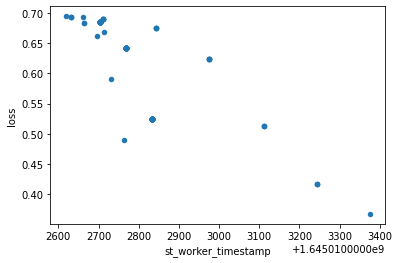

In [18]:
df[(df.trial_id==2)].plot.scatter(x='st_worker_timestamp',y='loss')